In [29]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [30]:
originalImage = cv2.imread("../photos/Characters Test Pattern 688x688.tif", cv2.IMREAD_GRAYSCALE)
#originalImage = cv2.resize(originalImage, (512, 512))

In [31]:
def addSaltPeperNoise(image, saltRatio, pepperRatio):
    noisyImage = image.copy()
    numOfPixels = image.size
    numOfSaltPixels = int(saltRatio * numOfPixels)
    numOfPepperPixels = int(pepperRatio * numOfPixels)

    for i in range(numOfSaltPixels):
        x, y = np.random.randint(0, noisyImage.shape) # (row, col) = (512, 512)
        noisyImage[x][y] = 255
    
    for i in range(numOfPepperPixels):
        x, y = np.random.randint(0, noisyImage.shape) # (row, col) = (512, 512)
        noisyImage[x][y] = 0

    return noisyImage

In [32]:
def averageFilter(image, kernelSize):
    padSize = kernelSize // 2
    paddedImage = np.pad(image, (padSize, padSize), mode='constant')

    filteredImage = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            kernelRegion = paddedImage[i: i+kernelSize, j: j+kernelSize]
            average = np.mean(kernelRegion)
            filteredImage[i, j] = average
    
    return filteredImage

In [33]:
# Peak Signal-to-Noise Ratio
def calcPNSR(image1, image2):  
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2)   # Mean Squared Error (MSE)
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)

    print(f"comute pnsr: {20 * np.log10(255.0 / np.sqrt(mse))}")
    
    return round(psnr, 2)

comute pnsr: 9.686886487511657
comute pnsr: 14.558741544466114
comute pnsr: 14.76401122793476
comute pnsr: 14.560561208544332


Text(0.5, 1.0, 'Filtered Image (PNSR=14.56) - mask (7x7)')

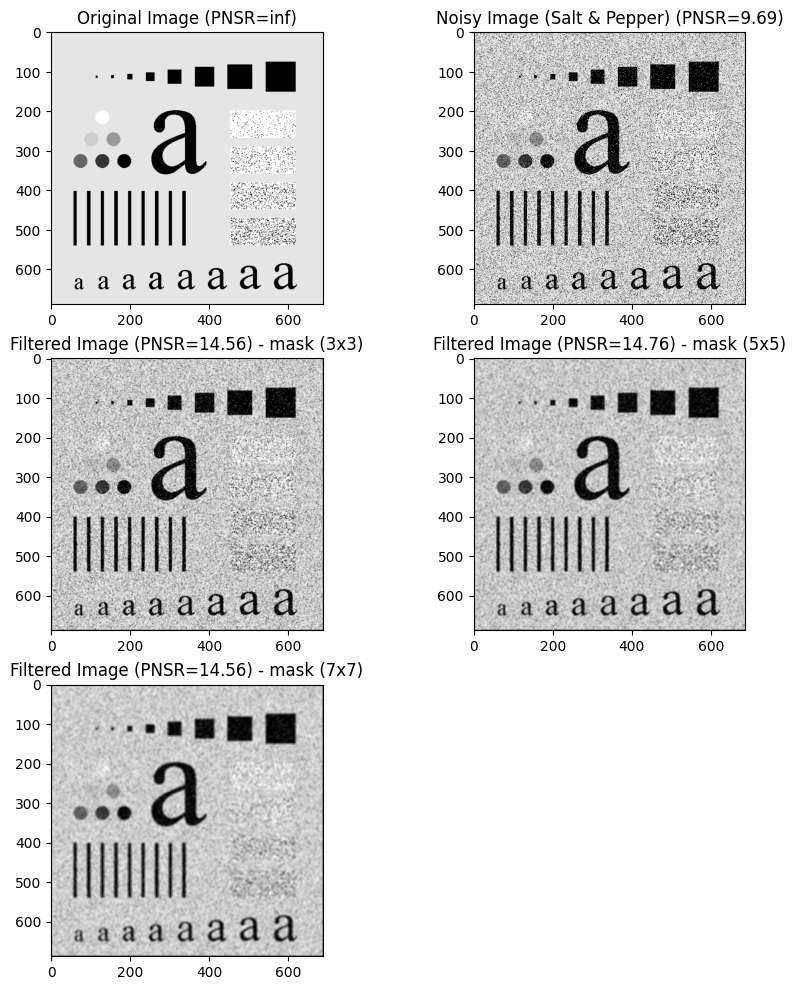

In [34]:
plt.figure(figsize=(10, 12))

plt.subplot(3, 2, 1)
plt.imshow(originalImage, cmap='gray')
plt.title(f"Original Image (PNSR={calcPNSR(originalImage, originalImage)})")

noisyImage = addSaltPeperNoise(originalImage, 0.05, 0.15)
plt.subplot(3, 2, 2)
plt.imshow(noisyImage, cmap='gray')
plt.title(f"Noisy Image (Salt & Pepper) (PNSR={calcPNSR(originalImage, noisyImage)})")

averageFilteredImage = averageFilter(noisyImage, 3)
plt.subplot(3, 2, 3)
plt.imshow(averageFilteredImage, cmap='gray')
plt.title(f"Filtered Image (PNSR={calcPNSR(originalImage, averageFilteredImage)}) - mask (3x3)")

averageFilteredImage = averageFilter(noisyImage, 5)
plt.subplot(3, 2, 4)
plt.imshow(averageFilteredImage, cmap='gray')
plt.title(f"Filtered Image (PNSR={calcPNSR(originalImage, averageFilteredImage)}) - mask (5x5)")

averageFilteredImage = averageFilter(noisyImage, 7)
plt.subplot(3, 2, 5)
plt.imshow(averageFilteredImage, cmap='gray')
plt.title(f"Filtered Image (PNSR={calcPNSR(originalImage, averageFilteredImage)}) - mask (7x7)")